Topic: Machine Learning
Domain: Data Science
Industry: Banking and Finance
Technology: Python,Pandas,NumPy,Matplotlib,Scikit-learn
Problem Topic: Credit Fraud Detection
Date of Assignment : 28th March 2023
Submission Deadline: 28th March 2023
Introduction to Problem Statement
Imagine you work for a consumer finance company which specializes in lending various types of
loans to urban customers. When the company receives a loan application, the company has to
make a decision for loan approval based on the applicant’s profile. Two types of risks are
associated with the bank’s decision:
● If the applicant is likely to repay the loan, then not approving the loan results in a loss of
business to the company
● If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then
approving the loan may lead to a financial loss for the company
The data given below contains the information about past loan applicants and whether they
‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default,
which may be used for taking actions such as denying the loan, reducing the amount of loan,
lending (to risky applicants) at a higher interest rate, etc.
In this case study, you will use EDA to understand how consumer attributes and loan attributes
influence the tendency of default.
When a person applies for a loan, there are two types of decisions that could be taken by the
company:
● Loan accepted: If the company approves the loan, there are 3 possible scenarios
described below:
● Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
● Current: Applicant is in the process of paying the installments, i.e. the tenure of the loan
is not yet completed. These candidates are not labeled as 'defaulted'.
● Charged-off: Applicant has not paid the installments in due time for a long period of time,
i.e. he/she has defaulted on the loan
● Loan rejected: The company had rejected the loan (because the candidate does not
meet their requirements etc.). Since the loan was rejected, there is no transactional
history of those applicants with the company and so this data is not available with the
company (and thus in this dataset)
Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans,
and financing of medical procedures. Borrowers can easily access lower interest rate loans
through a fast-online interface.
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of
financial loss (called credit loss). The credit loss is the amount of money lost by the lender when
the borrower refuses to pay or runs away with the money owed. In other words, borrowers who
default cause the largest amount of loss to the lenders. In this case, the customers labeled as
'charged-off' are the 'defaulters'.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby
cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of
this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind
loan default, i.e. the variables which are strong indicators of default. The company can utilize
this knowledge for its portfolio and risk assessment.
Results Expected
● Write all your code in one well-commented Python file; briefly mention the insights and
observations from the analysis.
● Explain the results of univariate, bivariate analysis etc. in business terms.
● Include visualizations and summarize the most important results.
● Form narrative questions from the dataset? Try to answer those questions with
supportive visualizations?
● For this you can perform univariate as well as bivariate analysis.
● After the numerical analysis is done, create a hypothesis.
● Then to support your hypothesis, perform the visual exploration to identify trends and
support your hypothesis.
● Build an appropriate machine learning model that can help the stakeholders in making
the decision of accepting or rejecting the loan application faster and with confidence.
● Test your model by dividing the dataset into a 70:30 ratio for training and testing.
● Print all the parameters used for evaluating your model.
● Discuss what steps you have used to avoid overfitting/underfitting the model.
Dataset link:
https://drive.google.com/file/d/15LErgl6CqWvKoEsscePF6Krb3uI_-3au/view?usp=sharing

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [265]:
df=pd.read_csv("C:\\Users\\N CH SHANMUKHA\\Downloads\\loan.csv")
df

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprecessing

In [266]:
x=list(df.columns)

In [267]:
d=[]
for i in x:
    if (df[i].isnull().sum() > 39717*0.75) or df[i].astype(object).describe().unique()[1]==1:
        d.append(i)
df.drop(columns=d,inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


## In the above snippet we are removing the attributes / features those who are having null values more than 75% data and also those columns/features/attributes those have a single repeating value in its entire column.

In [268]:
df.duplicated().sum()

0

## The above snippet will check for any duplicate values.
## so 0 at the output implies that we dont have any duplicate records.

In [269]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# EDA

In [270]:
df.drop(columns=['id', 'member_id'],inplace=True)

### as id and member_id dont have any importance we have removed that

In [271]:
df['total_rec_late_fee'].astype(object).describe()

count     39717.0
unique     1356.0
top           0.0
freq      37671.0
Name: total_rec_late_fee, dtype: float64

In [272]:
df['int_rate']=df['int_rate'].str[0:-2].astype(float)  # extracted the first two elements as it implies the number

In [273]:
for i in list(df.columns):
    print(df[i].describe())

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object
count    39717.000000
mean        11.967865
std          3.723011
min          5.400000
25%          9.200000
50%         11.800000
75%         14.500000
max         24.500000
Name: int_rate, dtype: float64
count    39717.000000
mean       324.561922
std    

## Feature engineering and feature Selection

In [274]:
df['desc']=df['desc'].str.len()

## the above will replace the value with its length although we can use nlp here to gain more accuracy but instead we use its length

In [275]:
df.drop(columns=['url'],inplace=True)  ## not required for our model

In [276]:
df.drop(columns=['title'],inplace=True)  ## As it has more number of unique values we droped the column

In [277]:
list(df['zip_code'])

['860xx',
 '309xx',
 '606xx',
 '917xx',
 '972xx',
 '852xx',
 '280xx',
 '900xx',
 '958xx',
 '774xx',
 '853xx',
 '913xx',
 '245xx',
 '606xx',
 '951xx',
 '641xx',
 '921xx',
 '067xx',
 '890xx',
 '921xx',
 '770xx',
 '335xx',
 '799xx',
 '917xx',
 '900xx',
 '605xx',
 '103xx',
 '150xx',
 '326xx',
 '564xx',
 '141xx',
 '080xx',
 '330xx',
 '974xx',
 '934xx',
 '405xx',
 '946xx',
 '445xx',
 '850xx',
 '604xx',
 '292xx',
 '088xx',
 '180xx',
 '029xx',
 '700xx',
 '010xx',
 '441xx',
 '104xx',
 '067xx',
 '061xx',
 '616xx',
 '913xx',
 '947xx',
 '914xx',
 '765xx',
 '980xx',
 '017xx',
 '972xx',
 '752xx',
 '787xx',
 '077xx',
 '951xx',
 '540xx',
 '225xx',
 '440xx',
 '437xx',
 '559xx',
 '921xx',
 '912xx',
 '325xx',
 '300xx',
 '923xx',
 '352xx',
 '013xx',
 '146xx',
 '074xx',
 '786xx',
 '937xx',
 '799xx',
 '331xx',
 '115xx',
 '191xx',
 '114xx',
 '908xx',
 '902xx',
 '902xx',
 '992xx',
 '750xx',
 '852xx',
 '937xx',
 '750xx',
 '559xx',
 '104xx',
 '950xx',
 '329xx',
 '226xx',
 '226xx',
 '992xx',
 '614xx',
 '802xx',


In [278]:
df.drop(columns=['zip_code'],inplace=True)

In [279]:
df['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

In [280]:
df['earliest_cr_line']=df['earliest_cr_line'].str[-2:].astype(float)

### In the above code we extracted last two elements where it represents the year and thus we converted into number/ int

In [281]:
df['defaulted']=(df['loan_status']=='Charged Off').astype(int)  ## Setting the target column

In [282]:
df['loan_status'],df['defaulted']

(0         Fully Paid
 1        Charged Off
 2         Fully Paid
 3         Fully Paid
 4            Current
             ...     
 39712     Fully Paid
 39713     Fully Paid
 39714     Fully Paid
 39715     Fully Paid
 39716     Fully Paid
 Name: loan_status, Length: 39717, dtype: object,
 0        0
 1        1
 2        0
 3        0
 4        0
         ..
 39712    0
 39713    0
 39714    0
 39715    0
 39716    0
 Name: defaulted, Length: 39717, dtype: int32)

# Checking for data imbalnce

<AxesSubplot:xlabel='defaulted', ylabel='Count'>

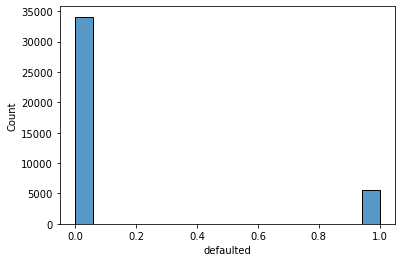

In [283]:
sns.histplot(df['defaulted'])

### as we can see that the data is imbalanced and thus we require to resample the data
### so we have four options for that 
### 1. under sampling majority (random)(duplicating)
### 1. over sampling minority (random)(duplicating)
### 1. under sampling majority (with slight manupulation)
### 1. over sampling minority (with slight manupulation)
### as we know that we have a huge data so we can go for under sampling , if our data would be minimal then we can go for over sampling for minority class.

How to Balance Data With the Imbalanced-Learn Python Module?
A number of more sophisticated resampling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let’s apply some of these resampling techniques using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

import imblearn
3. Random Under-Sampling With Imblearn
You may have heard about pandas, numpy, matplotlib, etc. while learning data science. But there is another library: imblearn, which is used to sample imbalanced datasets and improve your model performance.

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))
Image for post

In [284]:
x=df.drop(columns=['defaulted','loan_status'])
x

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.6,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.2,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.9,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.4,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.6,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.0,78.42,A,A4,FiSite Research,4 years,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.2,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.0,156.84,A,A4,NaN,< 1 year,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.4,155.38,A,A2,NaN,< 1 year,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [285]:
y=df['defaulted']

In [286]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', y.shape)
print('Resample dataset shape', y_rus.shape)

original dataset shape: (39717,)
Resample dataset shape (11254,)


### The above code is under sampling the majority class so that there will be a class balance so our model can be performed well.

In [287]:
y_rus.astype(object).describe()

count     11254
unique        2
top           1
freq       5627
Name: defaulted, dtype: int64

<AxesSubplot:xlabel='defaulted', ylabel='Count'>

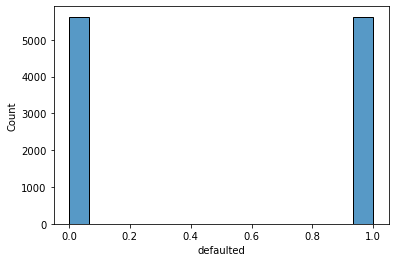

In [288]:
sns.histplot(y_rus)

now it seems to be balanced

In [289]:
x_rus

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,16000,16000,16000.0,36 months,13.0,539.57,C,C2,National Radio Astronomy Observatory,< 1 year,...,19305.97,16000.00,3305.97,0.00,0.00,0.00,Sep-13,3690.00,May-14,0.0
1,25000,25000,24975.0,60 months,14.6,590.17,C,C3,sonoma county water agency,4 years,...,28911.66,25000.00,3940.60,0.00,0.00,0.00,Feb-13,21270.17,May-16,0.0
2,5000,5000,5000.0,36 months,16.4,177.00,D,D3,SCG Communications LLC,3 years,...,6371.87,5000.00,1371.87,0.00,0.00,0.00,Jul-14,187.65,Jul-14,0.0
3,10000,10000,9975.0,36 months,7.5,311.11,A,A3,Allan hanley,6 years,...,11171.89,10000.00,1199.89,0.00,0.00,0.00,Oct-14,331.55,May-16,0.0
4,9000,9000,9000.0,60 months,11.1,196.18,B,B5,Brooklyn Sports Club,< 1 year,...,11770.48,9000.00,2770.48,0.00,0.00,0.00,Feb-16,195.86,Feb-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,2500,2500,675.0,36 months,12.8,84.00,D,D4,Nebraska Occupational Therapy,< 1 year,...,599.28,1706.01,477.21,1.69,35.70,0.38,Mar-10,1.76,May-16,NaN
11250,2500,2500,825.0,36 months,9.6,80.26,B,B4,AMZ Marketing,< 1 year,...,688.35,1730.83,354.44,1.36,0.00,0.00,Mar-10,1.40,May-16,NaN
11251,6500,6500,225.0,36 months,15.0,225.37,F,F1,Universal Advertising,9 years,...,139.42,2886.21,1168.14,0.00,0.00,0.00,Feb-09,225.37,May-16,NaN
11252,1000,1000,950.0,36 months,10.5,32.55,C,C2,Invision Power Services,2 years,...,668.87,544.02,138.64,0.00,21.29,0.23,May-09,32.55,Oct-09,NaN


In [290]:
cols=list(x.columns)
cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'desc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


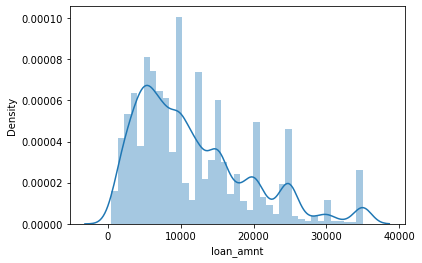

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


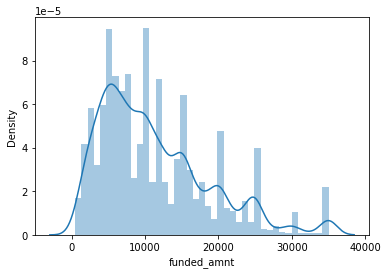

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


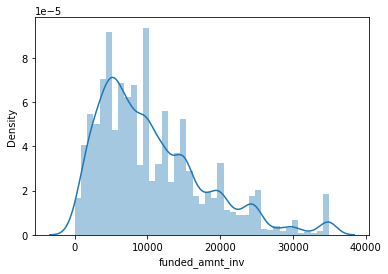

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


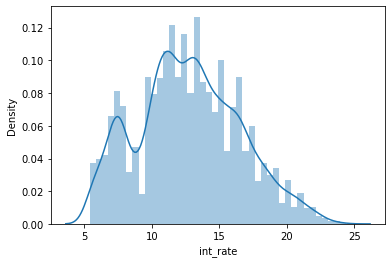

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


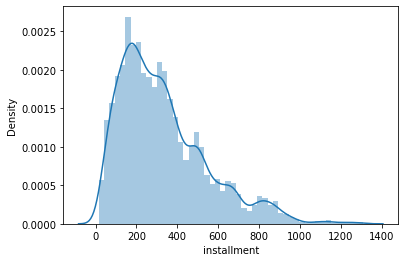

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


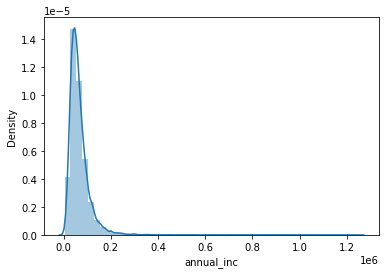

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


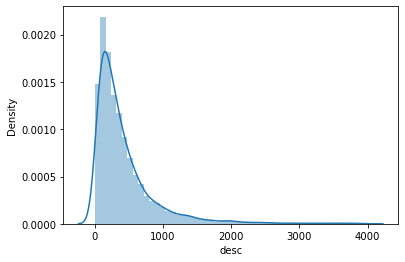

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


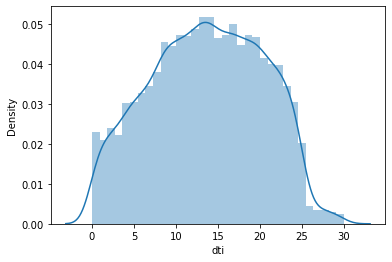

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


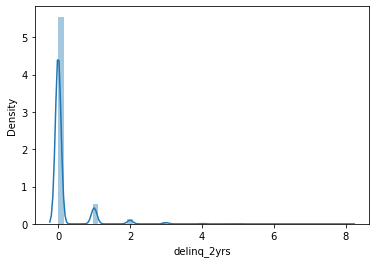

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


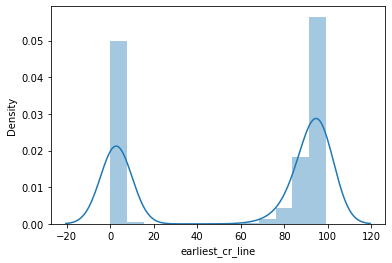

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


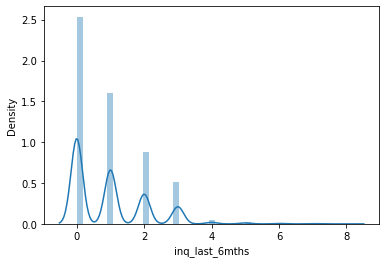

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


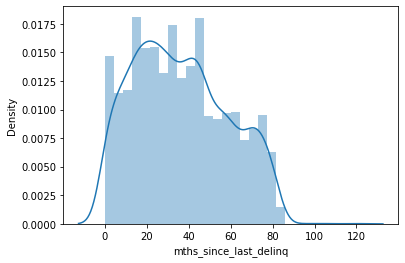

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


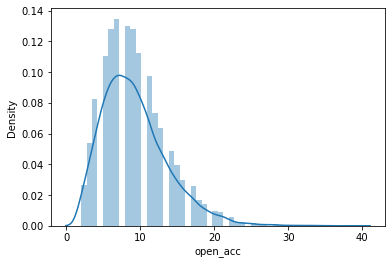

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


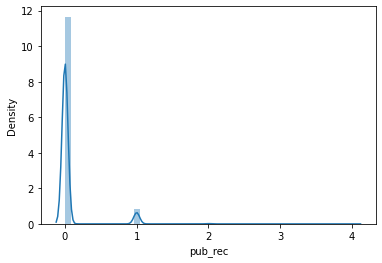

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


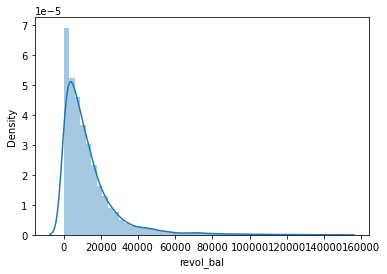

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


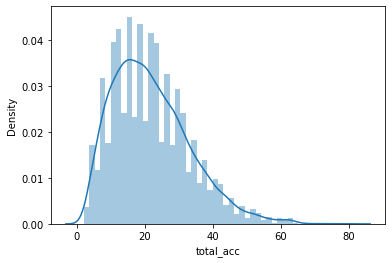

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


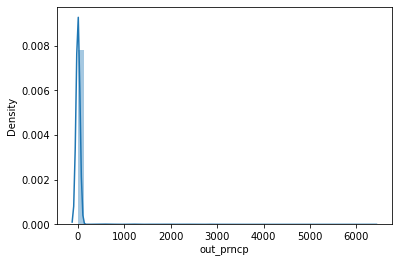

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


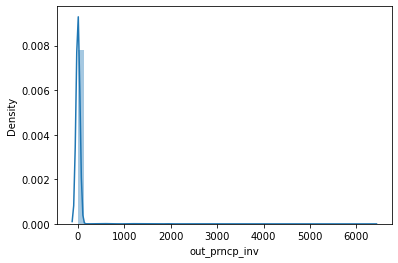

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


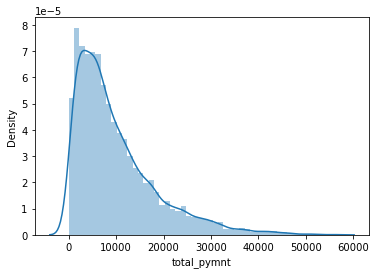

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


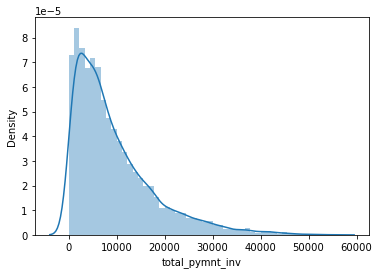

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


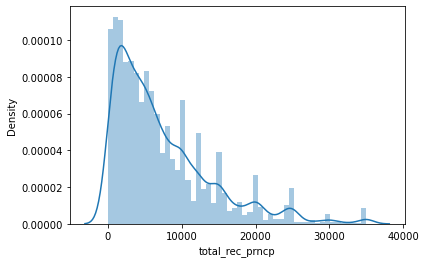

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


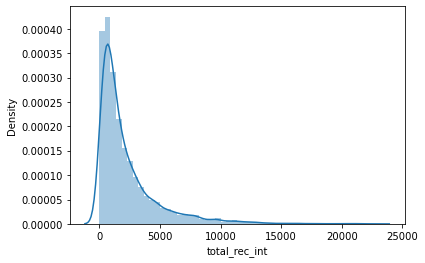

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


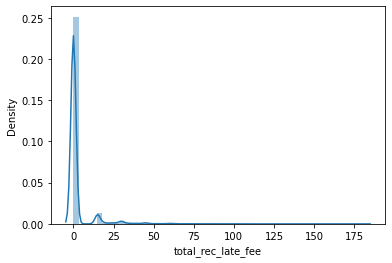

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


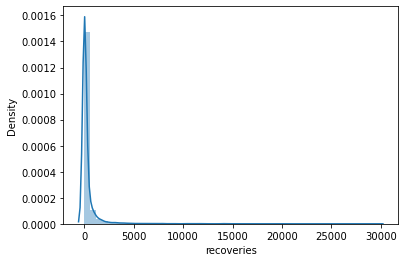

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


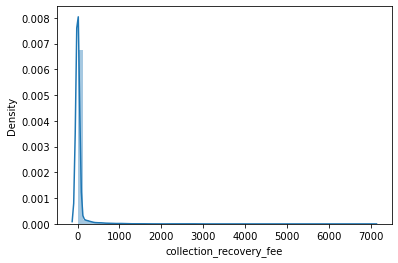

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


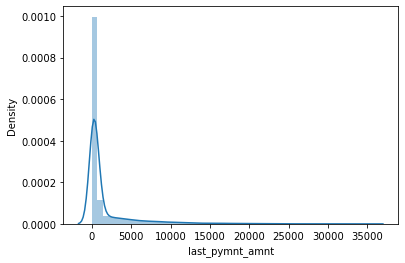

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


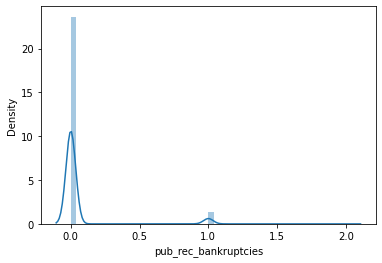

In [291]:
for i in cols:
    if x_rus[i].dtype!='O':
        sns.distplot(x_rus[i])
        plt.show()

<AxesSubplot:>

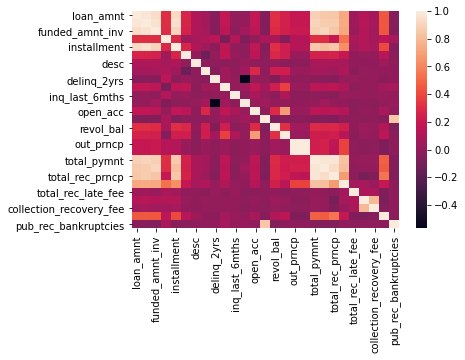

In [292]:
plt.Figure(figsize=(15,15))
sns.heatmap(x.corr())


## Removing highly co-related features

In [293]:
x_rus.drop(columns=['funded_amnt','funded_amnt_inv'],inplace=True)

In [294]:
x_rus.corr()

,loan_amnt,int_rate,installment,annual_inc,desc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.338163,0.925773,0.359422,0.122730,0.064195,-0.023754,0.196097,0.015360,0.007615,...,0.138026,0.743681,0.711741,0.633850,0.717161,0.074678,0.236583,0.124425,0.321842,-0.029117
int_rate,0.338163,1.000000,0.306985,0.090615,0.075780,0.092431,0.142722,-0.058817,0.114374,-0.041795,...,0.070295,0.207183,0.208834,0.040772,0.494107,0.098672,0.177951,0.092084,0.043035,0.092006
installment,0.925773,0.306985,1.000000,0.364192,0.115640,0.046236,-0.008448,0.173638,0.022488,-0.004622,...,0.090725,0.737505,0.696216,0.661598,0.635402,0.094787,0.215815,0.135871,0.306348,-0.030192
annual_inc,0.359422,0.090615,0.364192,1.000000,0.044399,-0.122178,0.028987,0.225795,0.031661,-0.031056,...,0.044520,0.323962,0.307370,0.302545,0.258774,0.030246,0.073700,0.050338,0.160883,-0.013008
desc,0.122730,0.075780,0.115640,0.044399,1.000000,-0.007357,-0.011871,0.014592,-0.019988,0.008911,...,0.002910,0.088817,0.088241,0.079336,0.086350,-0.007898,0.006876,0.003010,0.042098,0.016238
dti,0.064195,0.092431,0.046236,-0.122178,-0.007357,1.000000,-0.052450,0.052590,-0.014496,0.074177,...,0.030089,0.035884,0.042392,0.005726,0.086989,-0.019279,0.035273,0.013422,-0.016672,0.012614
delinq_2yrs,-0.023754,0.142722,-0.008448,0.028987,-0.011871,-0.052450,1.000000,0.049088,-0.002149,-0.575744,...,-0.021156,-0.024831,-0.030475,-0.039638,0.009989,0.025606,0.019713,0.023726,-0.013004,0.002685
earliest_cr_line,0.196097,-0.058817,0.173638,0.225795,0.014592,0.052590,0.049088,1.000000,0.037534,0.056870,...,0.025178,0.157391,0.142443,0.148240,0.122141,0.004477,0.036615,0.028023,0.073030,0.085700
inq_last_6mths,0.015360,0.114374,0.022488,0.031661,-0.019988,-0.014496,-0.002149,0.037534,1.000000,-0.007823,...,-0.030237,-0.042300,-0.056553,-0.058443,0.002425,0.042009,0.015623,0.011054,-0.024958,0.018730
mths_since_last_delinq,0.007615,-0.041795,-0.004622,-0.031056,0.008911,0.074177,-0.575744,0.056870,-0.007823,1.000000,...,0.028937,0.014492,0.058559,0.017643,0.012734,-0.020941,-0.019835,-0.036734,-0.001938,0.041050


<AxesSubplot:>

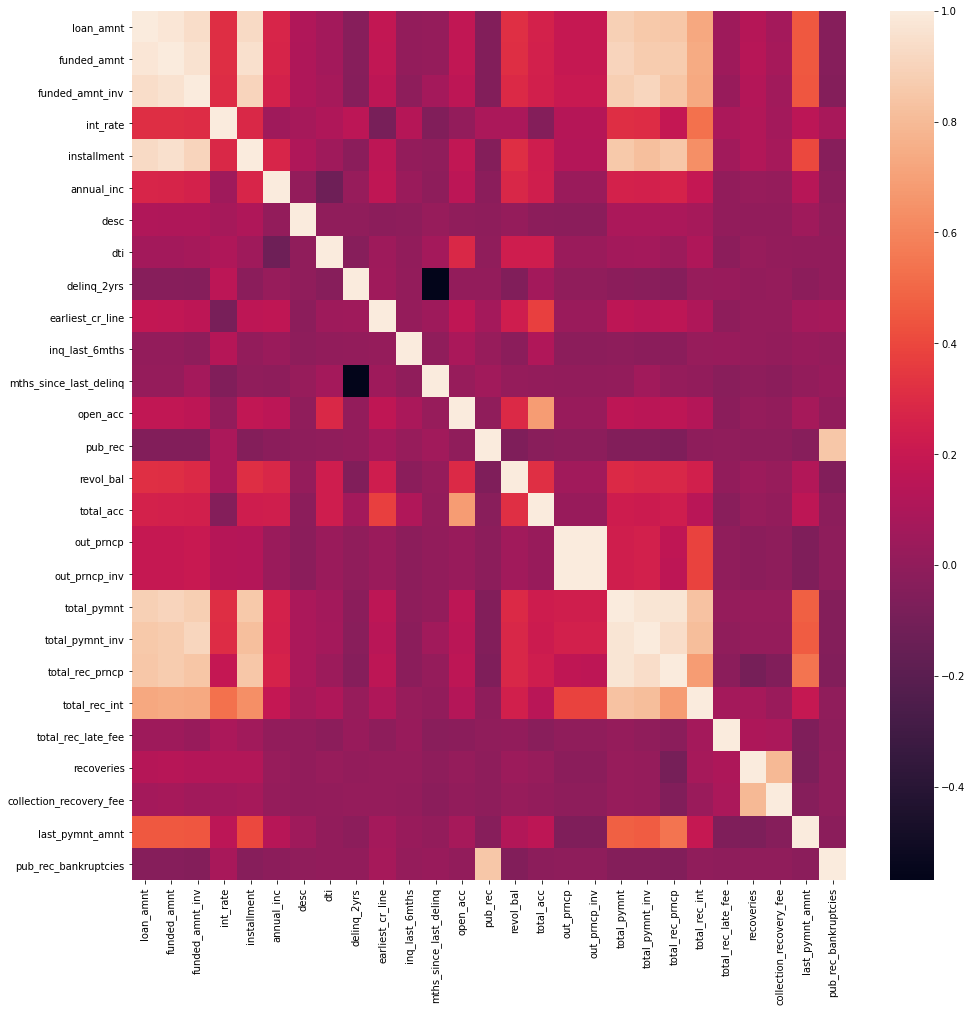

In [295]:
plt.figure(figsize=(16, 16))
sns.heatmap(x.corr())

In [296]:
x_rus.drop(columns=['installment','total_pymnt','total_pymnt_inv',],inplace=True)

<AxesSubplot:>

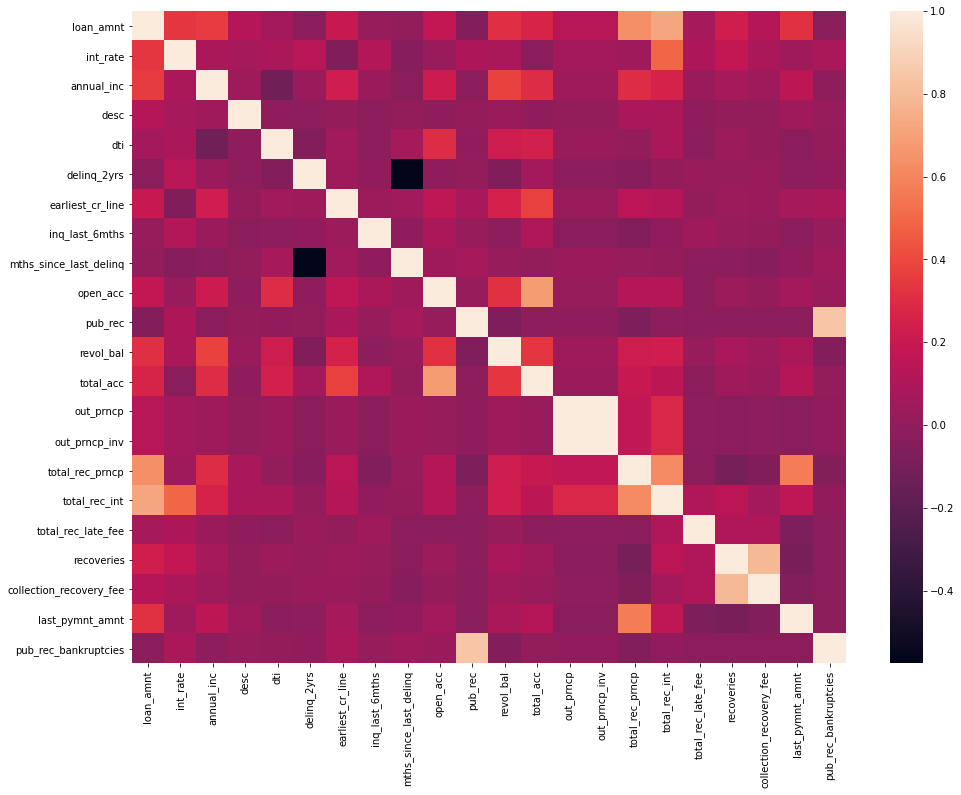

In [297]:
plt.figure(figsize=(16, 12))
sns.heatmap(x_rus.corr())

In [298]:
x_rus.drop(columns=['out_prncp_inv'],inplace=True)

In [299]:
cols=list(x_rus.columns)

In [300]:
d=[]
for i in cols:
    if x_rus[i].dtype == 'O':
        if len(x_rus[i].unique()) >=100:
            d.append(i)
d

['emp_title', 'revol_util', 'last_pymnt_d']

### the above code will find the columns whose having unique values greater than 100 so that we can remove them further

In [301]:
x_rus['revol_util']=x_rus['revol_util'].str[0:-2]                     # removing last element 

In [302]:
x_rus['revol_util']=x_rus['revol_util'].replace(to_replace=['','0']).astype(float)  ## replacing empty character with 0

In [303]:
x_rus['last_pymnt_d']=x_rus['last_pymnt_d'].str[-2:].astype(float)   # extracting last two elements

In [304]:
x_rus['earliest_cr_line']

0        97.0
1        97.0
2        74.0
3         5.0
4        87.0
         ... 
11249    92.0
11250    94.0
11251    90.0
11252     4.0
11253    96.0
Name: earliest_cr_line, Length: 11254, dtype: float64

In [305]:
def year(x):
    if x>50:
        return 100-x
    else:
        return -x

### The above code will be applied the feature so that it can find duration (last payment date - earliest credit line)

In [306]:
x_rus['earliest_cr_line']=x_rus['earliest_cr_line'].apply(year)

In [307]:
x_rus['duration']=x_rus['earliest_cr_line']+x_rus['last_pymnt_d']

In [308]:
x_rus.drop(columns=['last_pymnt_d','earliest_cr_line'],inplace=True)  ## drop these unwanted columns

In [309]:
cols=list(x_rus.columns)
for i in cols:
    print(i,x_rus[i].isnull().sum())

loan_amnt 0
term 0
int_rate 0
grade 0
sub_grade 0
emp_title 819
emp_length 370
home_ownership 0
annual_inc 0
verification_status 0
issue_d 0
desc 3649
purpose 0
addr_state 0
dti 0
delinq_2yrs 0
inq_last_6mths 0
mths_since_last_delinq 7145
open_acc 0
pub_rec 0
revol_bal 0
revol_util 19
total_acc 0
out_prncp 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_amnt 0
last_credit_pull_d 1
pub_rec_bankruptcies 217
duration 71


### the above code will check for null values

In [310]:
x_rus['desc']=x_rus['desc'].fillna(0)

In [311]:
x_rus.drop(columns=['mths_since_last_delinq','emp_title'],inplace=True)

In [312]:
cols=list(x_rus.columns)
for i in cols:
    if x_rus[i].dtype=='O':
        print(i,x_rus[i].nunique())

term 2
grade 7
sub_grade 35
emp_length 11
home_ownership 5
verification_status 3
issue_d 54
purpose 14
addr_state 48
last_credit_pull_d 95


In [313]:
x_rus.drop(columns=['last_credit_pull_d'],inplace=True)

In [314]:
cols=list(x_rus.columns)
for i in cols:
    print(i,x_rus[i].dtype,x_rus[i].isnull().sum(),sep='     ')

loan_amnt     int64     0
term     object     0
int_rate     float64     0
grade     object     0
sub_grade     object     0
emp_length     object     370
home_ownership     object     0
annual_inc     float64     0
verification_status     object     0
issue_d     object     0
desc     float64     0
purpose     object     0
addr_state     object     0
dti     float64     0
delinq_2yrs     int64     0
inq_last_6mths     int64     0
open_acc     int64     0
pub_rec     int64     0
revol_bal     int64     0
revol_util     float64     19
total_acc     int64     0
out_prncp     float64     0
total_rec_prncp     float64     0
total_rec_int     float64     0
total_rec_late_fee     float64     0
recoveries     float64     0
collection_recovery_fee     float64     0
last_pymnt_amnt     float64     0
pub_rec_bankruptcies     float64     217
duration     float64     71


In [315]:
x_rus['emp_length']=x_rus['emp_length'].fillna(x_rus['emp_length'].describe()[2])

In [316]:
x_rus['revol_util']=x_rus['revol_util'].fillna(x_rus['revol_util'].mean())

In [317]:
x_rus['pub_rec_bankruptcies']=x_rus['pub_rec_bankruptcies'].fillna(x_rus['pub_rec_bankruptcies'].mean())

In [318]:
x_rus['duration']=x_rus['duration'].fillna(x_rus['duration'].mean())

In [319]:
cols=list(x_rus.columns)
for i in cols:
    print(i,x_rus[i].dtype,x_rus[i].isnull().sum(),sep='     ')

loan_amnt     int64     0
term     object     0
int_rate     float64     0
grade     object     0
sub_grade     object     0
emp_length     object     0
home_ownership     object     0
annual_inc     float64     0
verification_status     object     0
issue_d     object     0
desc     float64     0
purpose     object     0
addr_state     object     0
dti     float64     0
delinq_2yrs     int64     0
inq_last_6mths     int64     0
open_acc     int64     0
pub_rec     int64     0
revol_bal     int64     0
revol_util     float64     0
total_acc     int64     0
out_prncp     float64     0
total_rec_prncp     float64     0
total_rec_int     float64     0
total_rec_late_fee     float64     0
recoveries     float64     0
collection_recovery_fee     float64     0
last_pymnt_amnt     float64     0
pub_rec_bankruptcies     float64     0
duration     float64     0


In [320]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [321]:
l=[]
for i in cols:
    if x_rus[i].dtype=='O':
        l.append(i)
l

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'addr_state']

In [322]:
ohe = OneHotEncoder(drop='first',sparse=True)
df1 = ohe.fit_transform(x_rus[l])
df1 = pd.DataFrame(df1.toarray())
df1

C:\Users\N CH SHANMUKHA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11252,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [323]:
x_rus.shape

(11254, 30)

In [324]:
x_rus.drop(columns=l,inplace=True)

In [325]:
x_rus=pd.concat([x_rus,df1],axis=1)
x_rus

,loan_amnt,int_rate,annual_inc,desc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,160,161,162,163,164,165,166,167,168,169
0,16000,13.0,65000.0,83.0,4.23,0,1,3,0,7634,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,25000,14.6,106000.0,0.0,7.15,0,2,9,0,29579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,16.4,60000.0,52.0,24.50,0,2,11,0,35018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000,7.5,30000.0,293.0,4.04,0,1,8,0,4905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9000,11.1,105000.0,0.0,12.13,0,0,8,0,26541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,2500,12.8,32000.0,75.0,20.00,0,1,11,0,3408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11250,2500,9.6,75000.0,37.0,20.00,0,3,9,0,269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11251,6500,15.0,213000.0,1002.0,6.45,0,0,11,0,56411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11252,1000,10.5,33990.0,207.0,14.47,0,1,9,0,4485,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [326]:
x_rus.columns = x_rus.columns.astype(str)

In [327]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(x_rus)
x = scaler.transform(x_rus)
x

array([[ 0.56504861,  0.07443684, -0.01671238, ..., -0.10293816,
        -0.05972411, -0.03889549],
       [ 1.71852604,  0.49467183,  0.84720819, ..., -0.10293816,
        -0.05972411, -0.03889549],
       [-0.84475715,  0.96743619, -0.12206855, ..., -0.10293816,
        -0.05972411, -0.03889549],
       ...,
       [-0.65251091,  0.59973057,  3.10183017, ..., -0.10293816,
        -0.05972411, -0.03889549],
       [-1.35741379, -0.58218033, -0.67013133, ..., -0.10293816,
        -0.05972411, -0.03889549],
       [ 1.07770524,  0.17949559,  1.6689863 , ..., -0.10293816,
        -0.05972411, -0.03889549]])

In [328]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_rus, test_size=0.30, random_state=32)

In [329]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)

In [330]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[1605,   43],
       [  42, 1687]], dtype=int64)

In [331]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dtree_predictions)

0.9748297305300563

In [332]:
from sklearn.metrics import f1_score
f1_score(y_test, dtree_predictions)

0.9754264238219139

In [333]:
from sklearn.metrics import recall_score
dtree_recall=recall_score(y_test,dtree_predictions)
dtree_recall

0.9757085020242915

In [334]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)
gnb_predictions = gnb.predict(x_test)
gnb_predictions

array([1, 0, 0, ..., 1, 1, 1])

In [335]:
train_acc=gnb.predict(x_train)
accuracy_score(y_train,train_acc)

0.7463501332994795

In [336]:
recall=recall_score(y_test,gnb_predictions)
recall

0.9676113360323887

In [337]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 40)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=40)

In [338]:
rfc_predictions=classifier.predict(x_test)
rfc_predictions

array([1, 0, 0, ..., 0, 1, 0])

In [339]:
train_acc=classifier.predict(x_train)
accuracy_score(y_train,train_acc)

0.9993652405738225

AxesSubplot(0.125,0.125;0.62x0.755)


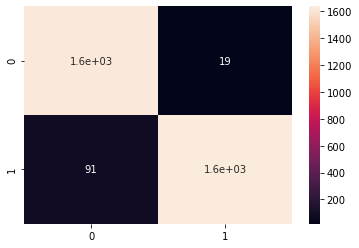

In [340]:
print(sns.heatmap((confusion_matrix(y_test, rfc_predictions)),annot=True))

In [341]:
recall=recall_score(y_test,rfc_predictions)
recall

0.9473684210526315

In [342]:
f1_score(y_test,rfc_predictions)

0.96751329001772

Considering the above accuracy scores of the above algorithms it seems to be random forest is giving the best results among others so we are saving the model which used random forest.

## Saving The Model

In [343]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickled_model = pickle.load(open('model2.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 0, 0, ..., 0, 1, 0])